<a href="https://colab.research.google.com/github/jfzo/notebooks-cursos/blob/master/usando_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Manejo de datos con Python y Pandas

En esta primera parte del módulo, trabajaremos con el siguiente conjunto de datos:

![Online retail](https://archive.ics.uci.edu/ml/datasets/Online%20Retail)

Citando la descripción original:

**Data Set Information:**

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

**Attribute Information:**

| Campo | Descripción |
|------|-----|
| InvoiceNo: | Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter **'c'**, it indicates a cancellation.|
|StockCode: | Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.|
|Description: | Product (item) name. Nominal.|
|Quantity: | The quantities of each product (item) per transaction. Numeric.|
|InvoiceDate: | Invice Date and time. Numeric, the day and time when each transaction was generated.|
|UnitPrice: | Unit price. Numeric, Product price per unit in sterling.|
|CustomerID: | Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.|
|Country: | Country name. Nominal, the name of the country where each customer resides. |


In [0]:
#@title Acceso a librería Pandas
import pandas as pd

Es posible cargar la data en un Dataframe a partir de la URL del repositorio:

In [0]:
df = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

df.to_excel('/content/gdrive/My Drive/Colab Notebooks/online_retail.xlsx')

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


---

También es posible cargar desde Google Drive. Las primeras dos líneas comentadas corresponden a las sentencias usadas para conectarse a su cuenta de Google Drive:

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

df = pd.read_excel('/content/gdrive/My Drive/Colab Notebooks/online_retail.xlsx')
#df.head()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


Podemos averiguar el tamaño del dataframe con su propiedad ```.shape```



In [0]:
df.shape

(541909, 9)

Podemos averiguar el detalle de cada columna del dataframe con su método interno ```.info()```


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532621 entries, 0 to 541908
Data columns (total 9 columns):
Unnamed: 0     532621 non-null int64
InvoiceNo      532621 non-null object
StockCode      532621 non-null object
Description    531166 non-null object
Quantity       532621 non-null int64
InvoiceDate    532621 non-null datetime64[ns]
UnitPrice      532621 non-null float64
CustomerID     397924 non-null float64
Country        532621 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 40.6+ MB


In [0]:
df.describe()

,Unnamed: 0,Quantity,UnitPrice,CustomerID
count,532621.000000,532621.000000,532621.000000,397924.000000
mean,271182.113612,10.239972,3.847621,15294.315171
std,156533.716737,159.593551,41.758023,1713.169877
min,0.000000,-9600.000000,-11062.060000,12346.000000
25%,135604.000000,1.000000,1.250000,13969.000000
50%,271292.000000,3.000000,2.080000,15159.000000
75%,406975.000000,10.000000,4.130000,16795.000000
max,541908.000000,80995.000000,13541.330000,18287.000000


In [0]:
#@title Visualización de los primeros 8 registros del dataframe
df.head(8)

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom


In [0]:
#@title Ordenamiento de los registros según columna *Descripción* 
df['Description'] = df['Description'].str.strip()
df.sort_values(by='Description', ascending=True).head(8)

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
20749,20749,538071,21120,*Boombox Ipod Classic,1,2010-12-09 14:09:00,16.98,NaN,United Kingdom
35675,35675,539437,20954,*USB Office Mirror Ball,1,2010-12-17 14:54:00,8.47,NaN,United Kingdom
37095,37095,539453,20954,*USB Office Mirror Ball,1,2010-12-17 17:08:00,8.47,NaN,United Kingdom
394482,394482,570872,22418,10 COLOUR SPACEBOY PEN,1,2011-10-12 16:40:00,1.63,NaN,United Kingdom
381759,381759,569893,22418,10 COLOUR SPACEBOY PEN,24,2011-10-06 15:51:00,0.85,12627.0,Germany
152701,152701,549682,22418,10 COLOUR SPACEBOY PEN,24,2011-04-11 13:22:00,0.85,12596.0,Spain
20498,20498,538057,22418,10 COLOUR SPACEBOY PEN,24,2010-12-09 13:38:00,0.85,13102.0,United Kingdom
470060,470060,576617,22418,10 COLOUR SPACEBOY PEN,2,2011-11-15 16:57:00,1.63,NaN,United Kingdom


In [0]:
#@title Considerando únicamente los campos tipo *object*
df.select_dtypes(include=['object']).head() #.copy() en lugar de .head() genera una copia del Dataframe

,InvoiceNo,StockCode,Description,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
1,536365,71053,WHITE METAL LANTERN,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom


In [0]:
#@title Considerando solo aquellas filas cuya columna *Country* coincida con *France*:
df[df["Country"] == "France"].head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
26,26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France
27,27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France
28,28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France
29,29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France
30,30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France


In [0]:
#@title Otra manera de filtrar, pero usando más de un valor de búsqueda:
df[df.Country.isin(['France','Spain'])].sort_values(by='Country', ascending=True).tail(10)

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
315729,315729,564734,47590B,PINK HAPPY BIRTHDAY BUNTING,4,2011-08-28 13:32:00,5.45,12484.0,Spain
315728,315728,564734,47566,PARTY BUNTING,3,2011-08-28 13:32:00,4.95,12484.0,Spain
315727,315727,564734,23298,SPOTTY BUNTING,3,2011-08-28 13:32:00,4.95,12484.0,Spain
315726,315726,564734,47566B,TEA TIME PARTY BUNTING,3,2011-08-28 13:32:00,4.95,12484.0,Spain
315725,315725,564734,47590A,BLUE HAPPY BIRTHDAY BUNTING,4,2011-08-28 13:32:00,5.45,12484.0,Spain
315724,315724,564734,22384,LUNCH BAG PINK POLKADOT,4,2011-08-28 13:32:00,1.65,12484.0,Spain
315723,315723,564734,21625,VINTAGE UNION JACK APRON,1,2011-08-28 13:32:00,6.95,12484.0,Spain
315722,315722,564734,22611,VINTAGE UNION JACK SHOPPING BAG,1,2011-08-28 13:32:00,4.95,12484.0,Spain
414283,414283,572442,22739,RIBBON REEL CHRISTMAS SOCK BAUBLE,10,2011-10-24 12:09:00,1.65,12546.0,Spain
248794,248794,558871,21243,PINK POLKADOT PLATE,32,2011-07-04 13:19:00,1.69,12557.0,Spain


In [0]:
#@title Otra manera de filtrar, pero usando condiciones sobre más de una columna:
df[(df["InvoiceDate"] < '2011-09-01') & (df["InvoiceDate"] > '2011-01-01')].head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
42481,42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom
42482,42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom
42483,42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom
42484,42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom
42485,42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom


----
### Selección de columnas

In [0]:
df["UnitPrice"].head()

0    2.55
1    3.39
2    2.75
3    3.39
4    3.39
Name: UnitPrice, dtype: float64

### Selección de filas (registros)

In [0]:
df[4:10]

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


### Selección de filas y columnas

In [0]:
df["UnitPrice"][:10]

0    2.55
1    3.39
2    2.75
3    3.39
4    3.39
5    7.65
6    4.25
7    1.85
8    1.85
9    1.69
Name: UnitPrice, dtype: float64

## Selección de multiples columnas

In [0]:
df[["InvoiceNo","UnitPrice"]][:5]

,InvoiceNo,UnitPrice
0,536365,2.55
1,536365,3.39
2,536365,2.75
3,536365,3.39
4,536365,3.39


## Contabilización de valores en una columna

In [0]:
df["Country"].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

Algo interesante

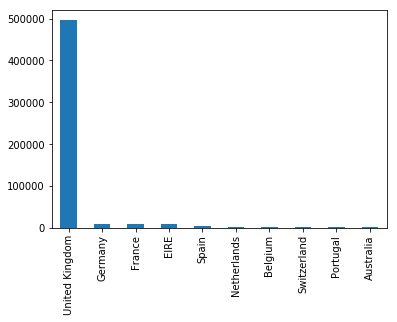

In [0]:
df["Country"].value_counts()[:10].plot(kind='bar')

## Filtrando filas por criterios en columnas

In [26]:
#@title Primero: El uso de un operador booleano genera una serie de valores booleanos con un valor por fila.
regs_ = df["UnitPrice"] > 3
regs_.head()

0    False
1     True
2    False
3     True
4     True
Name: UnitPrice, dtype: bool

Al usar la serie de valores booleanos con el dataframe obtendremos las filas en donde la serie tenía un valor ```True```.

In [27]:
df[regs_].head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom


Es posible agregar más condiciones al filtro usando el operador ```&``` 

In [28]:
regs_precio = df["UnitPrice"] > 3
regs_pais = df["Country"] == "Spain"
df[regs_precio & regs_pais].head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
21565,21565,538095,22504,CABIN BAG VINTAGE RETROSPOT,1,2010-12-09 14:55:00,29.95,17097.0,Spain
21571,21571,538095,22796,PHOTO FRAME 3 CLASSIC HANGING,2,2010-12-09 14:55:00,9.95,17097.0,Spain
21577,21577,538095,47566,PARTY BUNTING,1,2010-12-09 14:55:00,4.65,17097.0,Spain
21579,21579,538095,21430,SET/3 RED GINGHAM ROSE STORAGE BOX,1,2010-12-09 14:55:00,3.75,17097.0,Spain
21580,21580,538095,22914,BLUE COAT RACK PARIS FASHION,1,2010-12-09 14:55:00,4.95,17097.0,Spain


---

There is a little cleanup, we need to do. First, some of the descriptions have spaces that need to be removed. We’ll also drop the rows that don’t have invoice numbers and remove the credit transactions (those with invoice numbers containing C).

**Primero** debemos hacer algo de limpieza:

1. Eliminación de espacios extra en las descripciones.
2. Eliminar aquellas fileas que no tienen número de Invoice.
3. Quitar 


In [0]:
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]